<a href="https://colab.research.google.com/github/Daria-Lytvynenko/ML_course/blob/main/HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls drive/MyDrive/ML_course

application_data.csv.zip	columns_description.csv     medical-charges.csv
application_data_processed.zip	columns_description.gsheet  previous_application.csv.zip


In [40]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.subplots as ps
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
medical_df = pd.read_csv('drive/MyDrive/ML_course/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [4]:
x=non_smoker_df.age
y=non_smoker_df.charges
x_frame=x.to_frame()

theta=theta-alpha*

In [5]:
x=np.expand_dims(x, axis=1)
x

array([[18],
       [28],
       [33],
       ...,
       [18],
       [18],
       [21]])

In [6]:
x.dtype

dtype('int64')

In [7]:
def full_batch_gradient_descent(x, y, lr=0.0001, epochs=1000):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    ers = []
    for _ in range(epochs):
        y_preds = m * x[:, 0] + b
        er = y_preds - y
        ers.append(sum(er**2))
        m_gradient = (2/n) * np.dot(er, x[:, 0])
        b_gradient = (2/n) * np.sum(er)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, ers

m, b, ers = full_batch_gradient_descent(x, y, lr=0.0001, epochs=1000)
predictions_fbgd = m * x[:, 0] + b

m, b

(221.1045843794301, -41.98126853149978)

In [37]:
fig=px.line(ers )
fig.update_layout(xaxis_title='iteration', yaxis_title='error')
fig.show(legend=True)

In [8]:
predictions_fbgd

array([3937.9012503 , 6148.94709409, 7254.47001599, ..., 3937.9012503 ,
       3937.9012503 , 4601.21500344])

In [9]:
root_mean_squared_error(y, predictions_fbgd)

4713.250582815521

In [10]:
lr=LinearRegression()
lr.fit(x_frame,y)

LinearRegression()

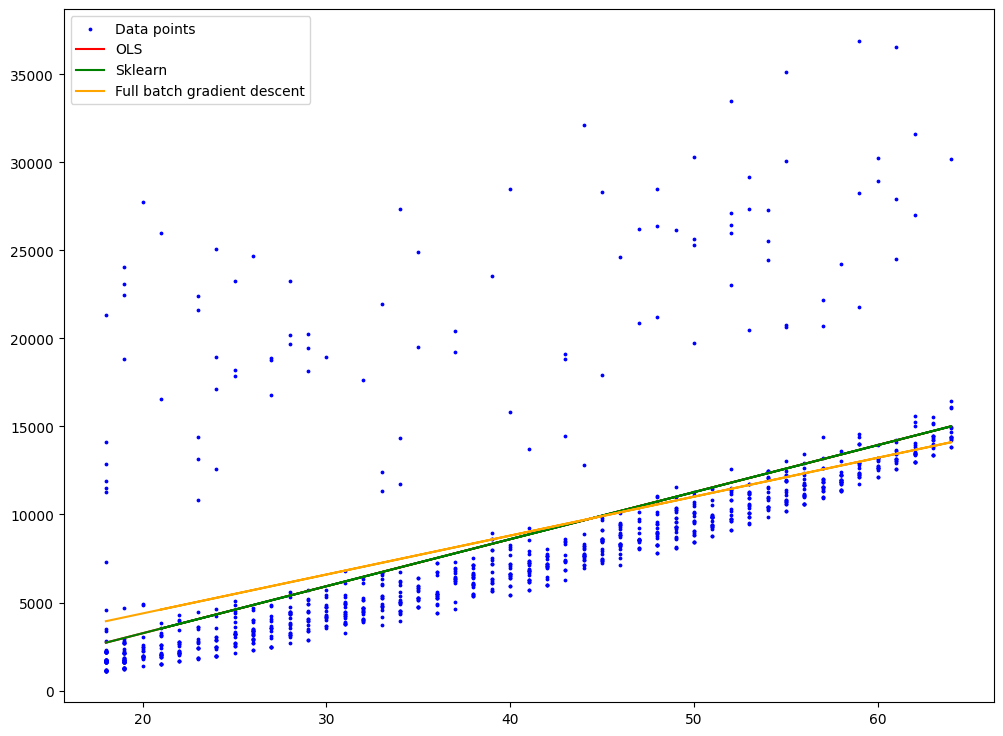

In [54]:
plt.figure(figsize=(12,9))
plt.scatter(non_smoker_df.age, non_smoker_df.charges, label='Data points', s=3, color='blue')
plt.plot(non_smoker_df.age, y_pred, color='red', label='OLS')
plt.plot(non_smoker_df.age, y_pred_lr, color='green', label='Sklearn')
plt.plot(non_smoker_df.age, predictions_fbgd, color='orange', label='Full batch gradient descent')
plt.legend()



In [11]:
lr.coef_, lr.intercept_

(array([267.24891283]), -2091.4205565650864)

In [12]:
y_pred_lr=lr.predict(x_frame)

In [13]:
root_mean_squared_error(y, y_pred_lr)

4662.505766636395

In [14]:
x.shape

(1064, 1)

In [15]:
x=np.c_[np.ones((x.shape[0],1)),x]

In [16]:
x

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       ...,
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 21.]])

X.T * X * theta=X.T * y
L=(y-theta*X).T *(y-theta*X)
Мінімізація фнукції втрат: похідна від L по theta, тому що в мінімумі функції похідна = 0
theta=(X.T * X)**-1 * X.T * y

In [17]:
theta=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

In [18]:
theta.shape

(2,)

In [19]:
y_pred=np.dot(x, theta)

In [20]:
y_pred

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [21]:
px.scatter(y_pred, trendline='ols')

In [22]:
non_smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


In [23]:
rms=root_mean_squared_error(y, y_pred)

In [24]:
rms

4662.505766636395

In [25]:
rmse=np.sqrt(sum((y-y_pred)**2)/len(y))

In [26]:
rmse

4662.505766636393

In [27]:
errors=y-y_pred

In [28]:
stat, pvalue=shapiro(errors)

In [29]:
stat, pvalue

(0.4948739848262308, 1.2522403040505031e-47)

In [30]:
px.histogram(errors)

In [31]:
px.scatter(errors, trendline='ols')

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [56]:
smoker_df=medical_df[medical_df.smoker=='yes']

In [57]:
lr_smoker=LinearRegression()

In [59]:
x_smoker=smoker_df.age.to_frame()
y_smoker=smoker_df.charges

In [76]:
y.describe()

,charges
count,1064.000000
mean,8434.268298
std,5993.781819
min,1121.873900
25%,3986.438700
50%,7345.405300
75%,11362.887050
max,36910.608030


In [61]:
lr_smoker.fit(x_smoker, y_smoker)

LinearRegression()

In [75]:
lr_smoker.coef_, lr_smoker.intercept_

(array([305.23760211]), 20294.128126915966)

In [63]:
y_pred_sm=lr_smoker.predict(x_smoker)

In [64]:
rmse_smoker=root_mean_squared_error(y_smoker, y_pred_sm)

In [65]:
rmse_smoker

10711.00334810241

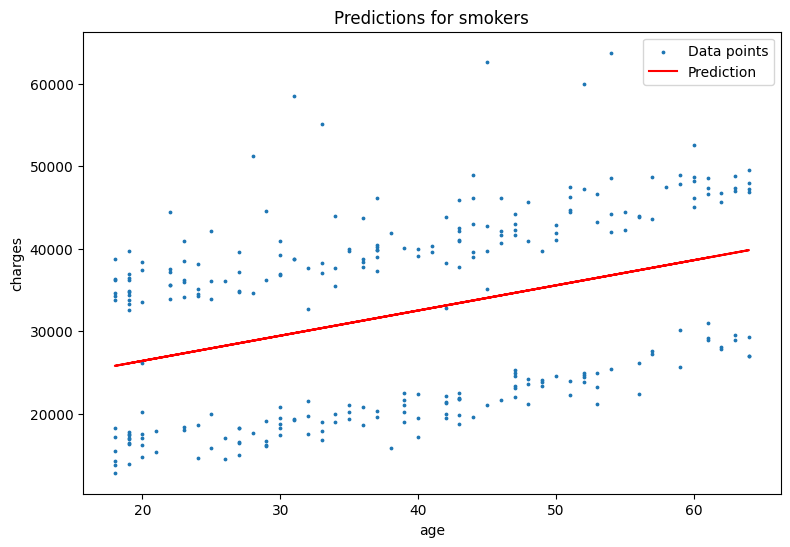

In [74]:
fig=plt.figure(figsize=(9,6))
plt.scatter(smoker_df.age, smoker_df.charges, label='Data points', s=3)
plt.plot(smoker_df.age, y_pred_sm, color='red', label='Prediction')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Predictions for smokers')
plt.legend()
plt.show()

Модель дуже погана, показник RMSE дуже високий, в 2 рази більше за середньоквадратичне відхилення, оскільки дані дуже сильно відрізняються в межах одного й того ж віку, тож неможливо їх описати лінійною моделлю, принаймні за допомогою лише одного параметру "вік".